## Project : Football Game Analysis
##Author : G.Padmasri
##Date : May 2019
##Academy : UPx

## This project makes the analysis of various factors of the Football game and gives the output of the analysis.

1. No. of Matches played in each league season.
2. % of Home team and Away team win.
3. chart to show the over all progress of Home team,Away Team and Draw of       matches for each season.
4. Relegation Analysis. Teams that got relegated in each league.
5. Playing styles: shots and fouls. More number of Home/Away team shots on Target more the shots.More number of fouls less the shots.
6. Promoted Teams in all seasons.
7. Refere Alalysis.



In [0]:
import pandas as pd
import seaborn as sb
import numpy as np
from datetime import datetime as dt
import io

from matplotlib import pyplot as plt

from google.colab import files
filepath = files.upload()

Saving 2012-13.csv to 2012-13 (1).csv
Saving 2013-14.csv to 2013-14 (1).csv
Saving 2014-15.csv to 2014-15 (1).csv
Saving 2015-16.csv to 2015-16 (1).csv


## Percentage of Home Team,AwayTeam win and draw analysys for each league season.

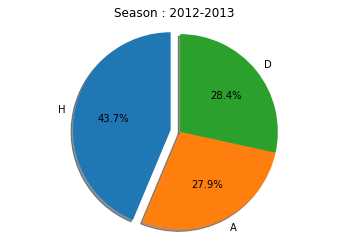

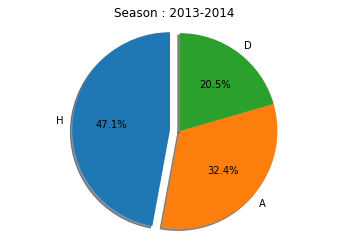

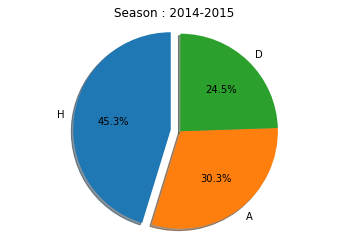

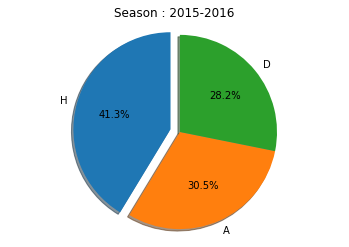

In [0]:

df2012_13 = pd.read_csv (io.StringIO(filepath['2012-13.csv'].decode('utf-8')),usecols=["Date","HomeTeam","AwayTeam","FTHG","FTAG","FTR","Referee","HS","AS","HF","AF","HST","AST","HY","HR","AY","AR"]) 
df2013_14 = pd.read_csv (io.StringIO(filepath['2013-14.csv'].decode('utf-8')),usecols=["Date","HomeTeam","AwayTeam","FTHG","FTAG","FTR","Referee","HS","AS","HF","AF","HST","AST","HY","HR","AY","AR"]) 
df2014_15 = pd.read_csv (io.StringIO(filepath['2014-15.csv'].decode('utf-8')),usecols=["Date","HomeTeam","AwayTeam","FTHG","FTAG","FTR","Referee","HS","AS","HF","AF","HST","AST","HY","HR","AY","AR"]) 
df2015_16 = pd.read_csv (io.StringIO(filepath['2015-16.csv'].decode('utf-8')),usecols=["Date","HomeTeam","AwayTeam","FTHG","FTAG","FTR","Referee","HS","AS","HF","AF","HST","AST","HY","HR","AY","AR"]) 

league_Seasons = ['2012-2013','2013-2014','2014-2015','2015-2016']


def displayWinpercentage(leagueDataFrame,leagueseason):

  gk = leagueDataFrame.groupby('FTR')

  lstResultLabel = ['H','A','D']
  lstResult = []

  lstResult.append(((gk.get_group('H'))['HomeTeam']).count() )
  lstResult.append(((gk.get_group('A'))['AwayTeam']).count() )
  lstResult.append(((gk.get_group('D'))['AwayTeam']).count() )
  #print(lstResult)
  xexplode = (0.1, 0, 0)
  plt.pie(lstResult,labels=lstResultLabel,explode= xexplode,autopct='%1.1f%%',shadow=True, startangle=90)
  plt.axis('equal')
  plt.title("Season : " + leagueseason )
  plt.show()

displayWinpercentage(df2012_13,league_Seasons[0])
displayWinpercentage(df2013_14,league_Seasons[1])
displayWinpercentage(df2014_15,league_Seasons[2])
displayWinpercentage(df2015_16,league_Seasons[3])

##Multiple bar chart to show the over all progress of Home team,Away Team and Draw of matches for each season.

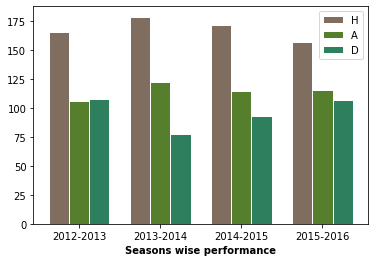

In [0]:

league_Seasons = ['2012-2013','2013-2014','2014-2015','2015-2016']

homeTeamCount = []
awayTeamCount = []
drawCount = []

#method to add the data to the respective lists....
def addData(FBdataframe):

    gk = FBdataframe.groupby('FTR')
    gk.first()

    homeTeamCount.append(((gk.get_group('H'))['HomeTeam']).count() )

    awayTeamCount.append(((gk.get_group('A'))['AwayTeam']).count() )

    drawCount.append(((gk.get_group('D'))['HomeTeam']).count() )


#Calling the method to fetech the data...
addData(df2012_13)
addData(df2013_14)
addData(df2014_15)
addData(df2015_16)


# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(homeTeamCount))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, homeTeamCount, color='#7f6d5f', width=barWidth, edgecolor='white', label='H')
plt.bar(r2, awayTeamCount, color='#557f2d', width=barWidth, edgecolor='white', label='A')
plt.bar(r3, drawCount, color='#2d7f5e', width=barWidth, edgecolor='white', label='D')
 
# Add xticks on the middle of the group bars
plt.xlabel('Seasons wise performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(homeTeamCount))], league_Seasons)
 
# Create legend & Show graphic
plt.legend()
plt.show()


## Relegation Analysis. Teams that got relegated in each season.

[2, 9, 8]


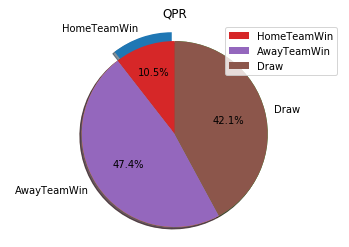

[4, 7, 8]


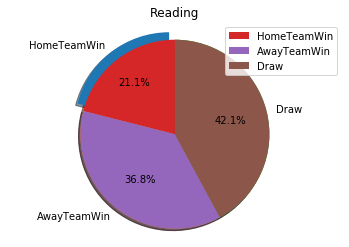

[4, 9, 6]


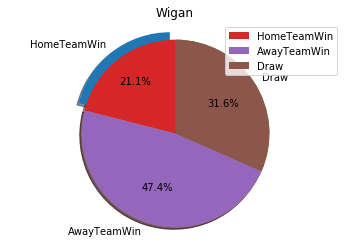

[6, 7, 6]


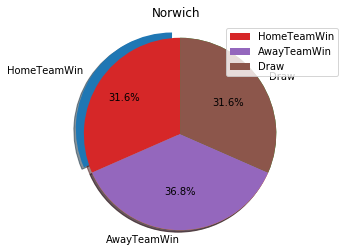

[5, 11, 3]


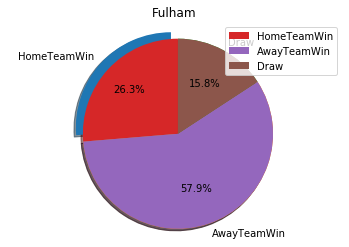

[5, 9, 5]


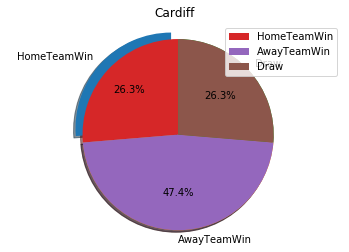

[6, 8, 5]


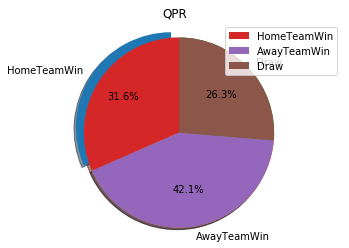

[4, 8, 7]


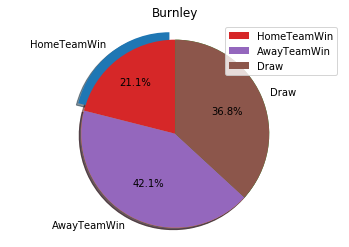

[5, 9, 5]


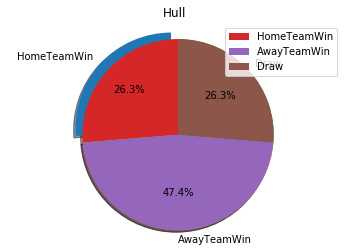

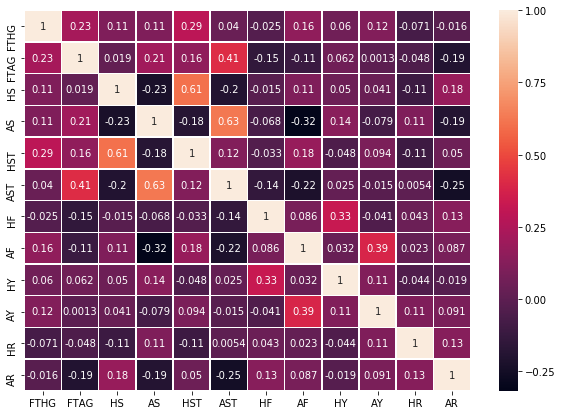

In [0]:
lstRelegated12_13 = [] #teams that are present in 2012-2013 but got relegated in 2013-2014
lstRelegated13_14 = []
lstRelegated14_15 = []

lstRelegated12_13 = df2012_13[~df2012_13["HomeTeam"].isin(df2013_14["HomeTeam"])]['HomeTeam'].unique()
lstRelegated13_14 = df2013_14[~df2013_14["HomeTeam"].isin(df2014_15["HomeTeam"])]['HomeTeam'].unique()
lstRelegated14_15 = df2014_15[~df2014_15["HomeTeam"].isin(df2015_16["HomeTeam"])]['HomeTeam'].unique()

df1213 = df2012_13[~df2012_13["HomeTeam"].isin(df2013_14["HomeTeam"])]
df1314 = df2013_14[~df2013_14["HomeTeam"].isin(df2014_15["HomeTeam"])]
df1415 = df2014_15[~df2014_15["HomeTeam"].isin(df2015_16["HomeTeam"])]

lstRelegatedTeamLabel = ['HomeTeamWin','AwayTeamWin','Draw']

def drawPieiagram(lstRelgResult,relTeamName):

    xexplode = (0.1, 0, 0)
    plt.pie(lstRelgResult,labels=lstRelegatedTeamLabel,explode= xexplode,autopct='%1.1f%%',shadow=True, startangle=90)
    patches, texts = plt.pie(lstRelgResult, shadow=True, startangle=90)
    plt.legend(patches, lstRelegatedTeamLabel, loc="best")
    plt.axis('equal')
    plt.title(relTeamName)
    plt.show()


   
def relegPieAnalysis(dfRelegatedTeamsdata,lstRelegatedTeams):    

    gk1 = dfRelegatedTeamsdata.groupby('HomeTeam')
    gk1.first()

    for x in range(len(lstRelegatedTeams)):    

        lstResult = []
       # print(x)

        lstResult.append(list(gk1.get_group(lstRelegatedTeams[x])['FTR']).count('H'))
        lstResult.append(list(gk1.get_group(lstRelegatedTeams[x])['FTR']).count('A'))
        lstResult.append(list(gk1.get_group(lstRelegatedTeams[x])['FTR']).count('D'))
        print(lstResult)
        drawPieiagram(lstResult,lstRelegatedTeams[x])


relegPieAnalysis(df1213,lstRelegated12_13)
relegPieAnalysis(df1314,lstRelegated13_14)
relegPieAnalysis(df1415,lstRelegated14_15)

dfRelegation_AllSeasons = pd.concat([df1213,df1314,df1415])


# Heat map for relegation analysis

dfcorr=dfRelegation_AllSeasons.corr()
plt.figure(figsize=(10,7))
sb.heatmap(dfcorr,annot=True,linewidths=.5,)

##Playing styles: shots and fouls. More number of Home/Away team shots on Target more the shots.More number of fouls less the shots.

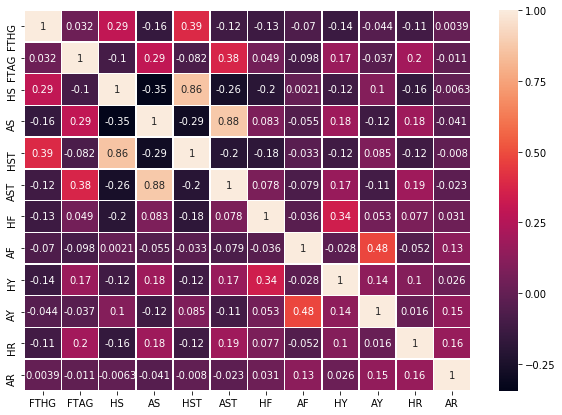

In [0]:
dfcorr=df2012_13.corr()
plt.figure(figsize=(10,7))
sb.heatmap(dfcorr,annot=True,linewidths=.5,)

## Promoted Teams in all seasons.

['Arsenal' 'Newcastle' 'West Brom' 'West Ham' 'Man City' 'Everton'
 'Chelsea' 'Aston Villa' 'Man United' 'Southampton' 'Swansea' 'Tottenham'
 'Liverpool' 'Stoke' 'Sunderland']


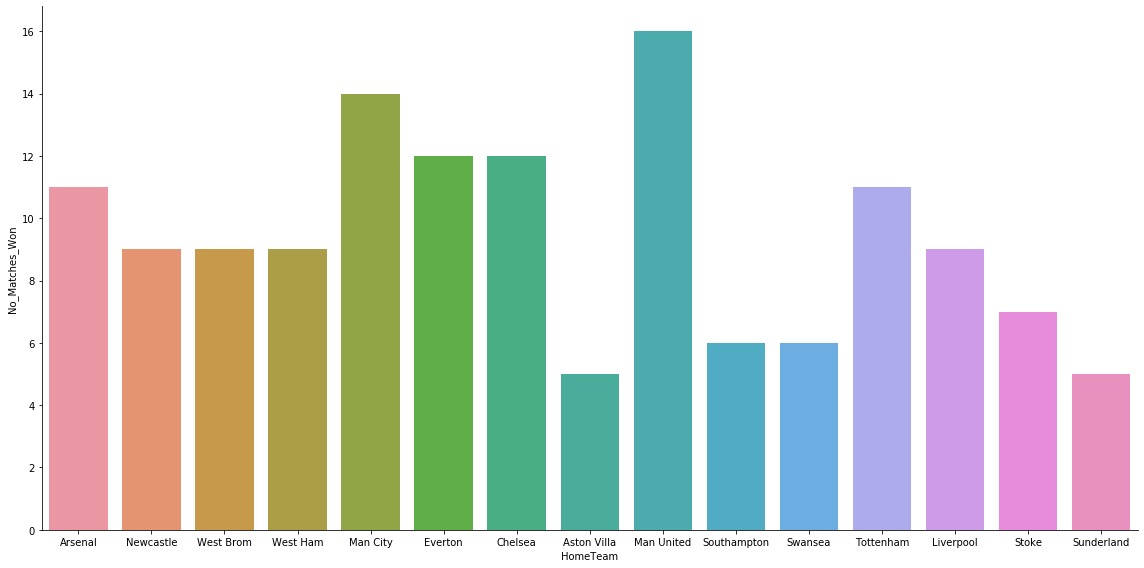

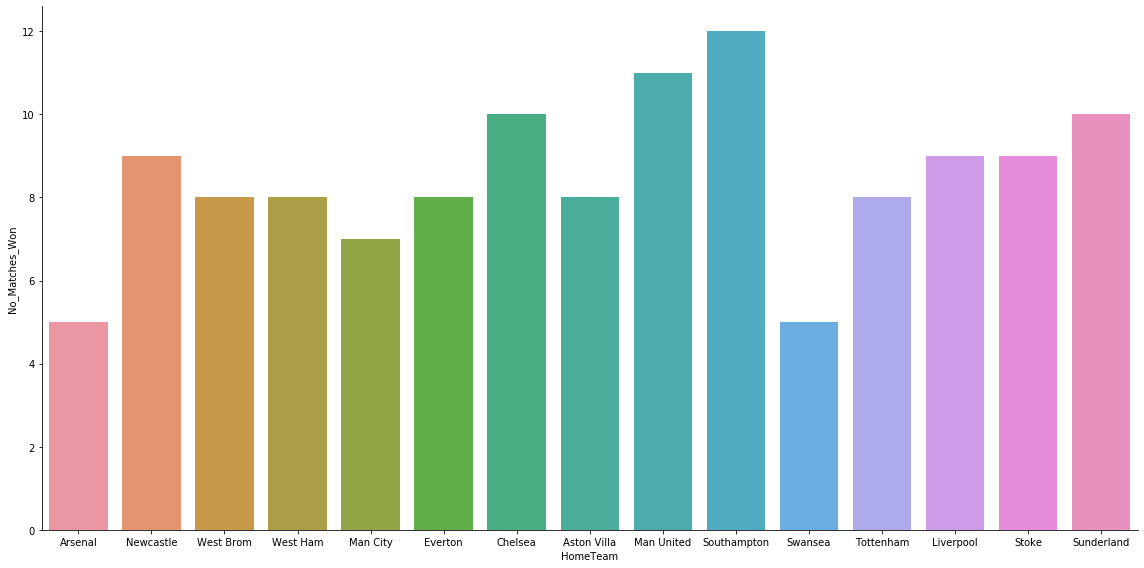

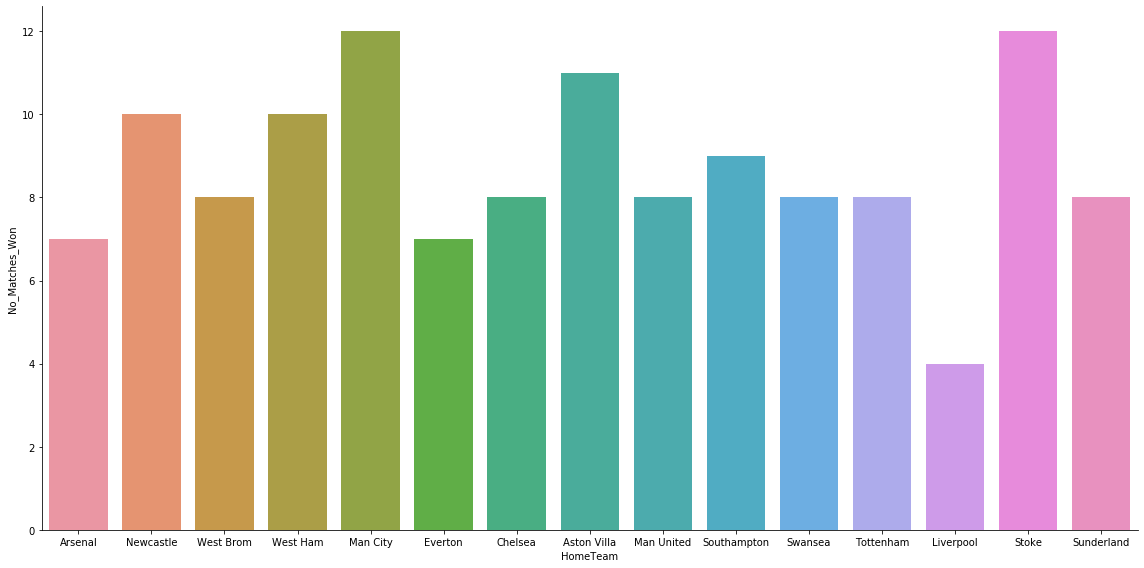

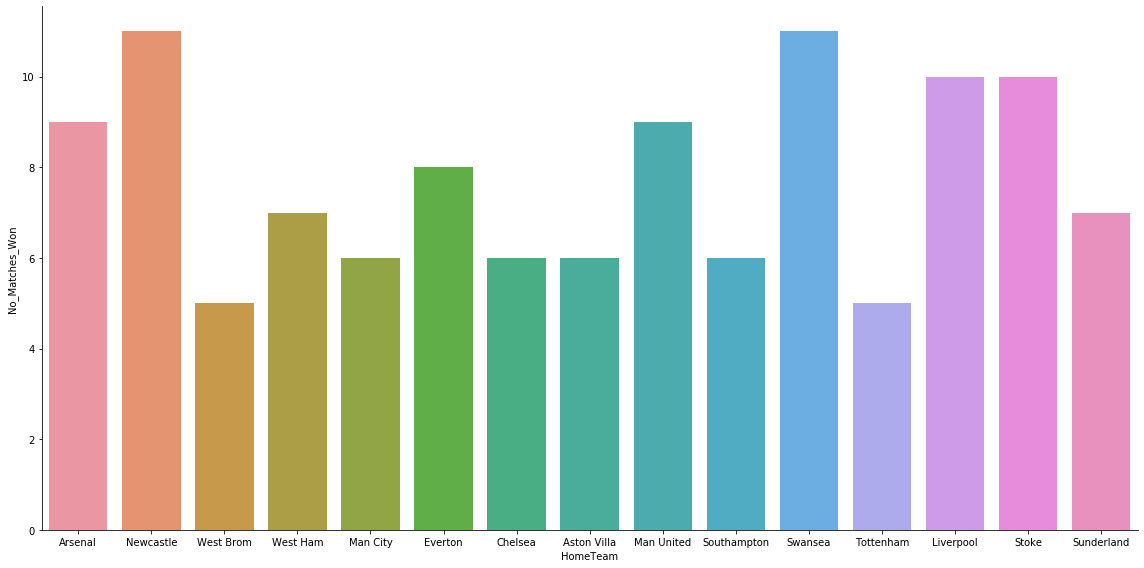

In [0]:
lstPromotedTeams = df2012_13[df2012_13["HomeTeam"].isin(df2013_14["HomeTeam"]) & df2012_13["HomeTeam"].isin(df2014_15["HomeTeam"])
                    & df2012_13["HomeTeam"].isin(df2015_16["HomeTeam"]) ]['HomeTeam'].unique()

print(lstPromotedTeams)

def drawbarHTPromoted(sourceDataframe,strlabel):
   
    lstHomeTeams_MatchesWon = []
    for i in lstPromotedTeams:

         rowItem = sourceDataframe.loc[df2012_13['HomeTeam']==i]
         lstHomeTeams_MatchesWon.append(((rowItem.loc[rowItem['FTR']=='H'])['FTR']).count())

    list_of_tuples = list(zip(lstPromotedTeams, lstHomeTeams_MatchesWon))

    df_HomeTeam = pd.DataFrame(list_of_tuples, columns = ['HomeTeam', 'No_Matches_Won'])
    sb.catplot(x='HomeTeam',y='No_Matches_Won',  height=8,aspect=2    ,kind='bar', data=df_HomeTeam)

drawbarHTPromoted(df2012_13,'2012-2013')
drawbarHTPromoted(df2013_14,'2013-2014')
drawbarHTPromoted(df2014_15,'2014-2015')
drawbarHTPromoted(df2015_16,'2015-2016')


## Refere Alalysis

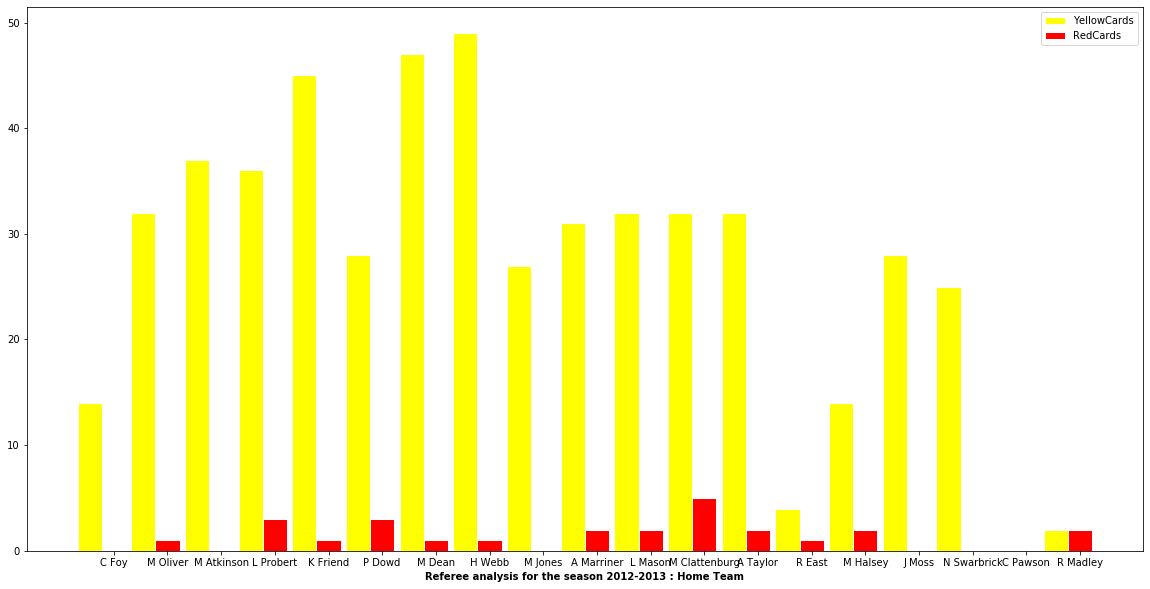

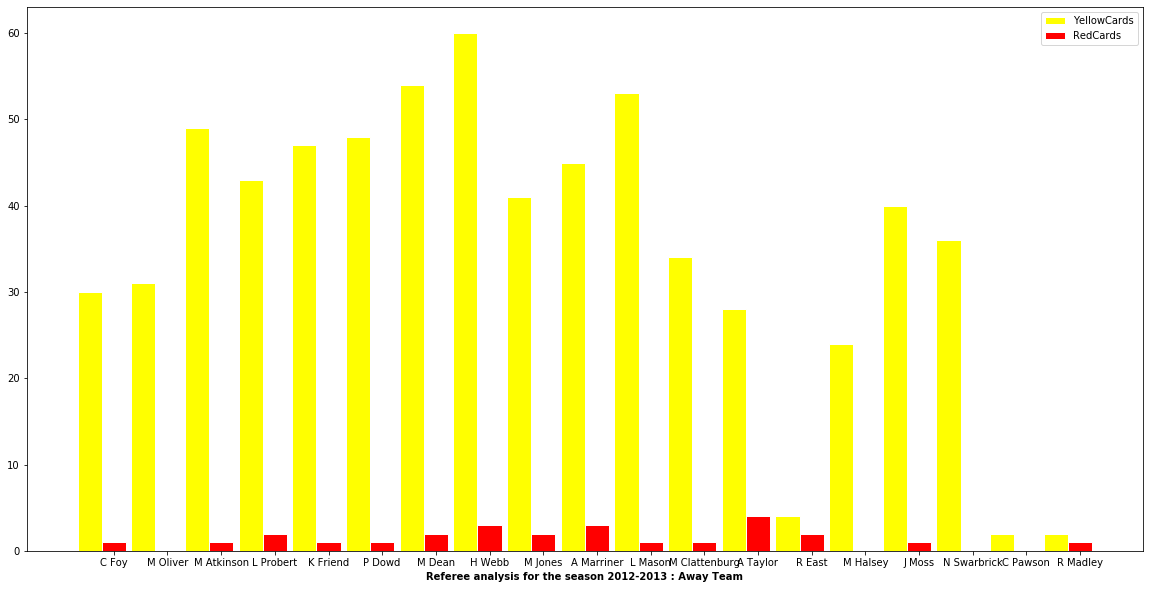

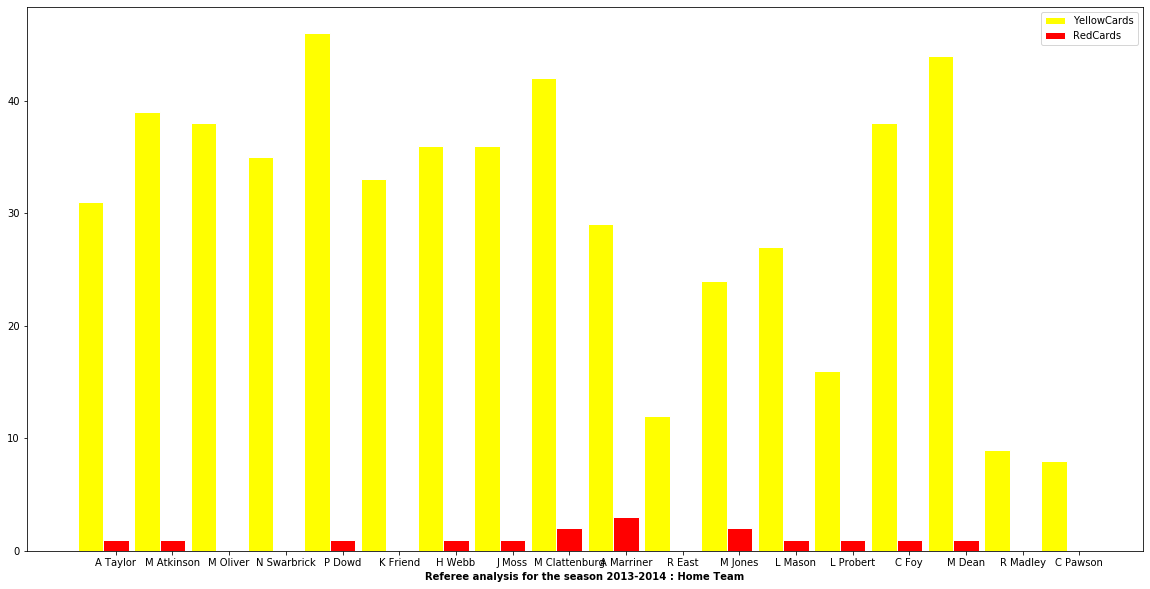

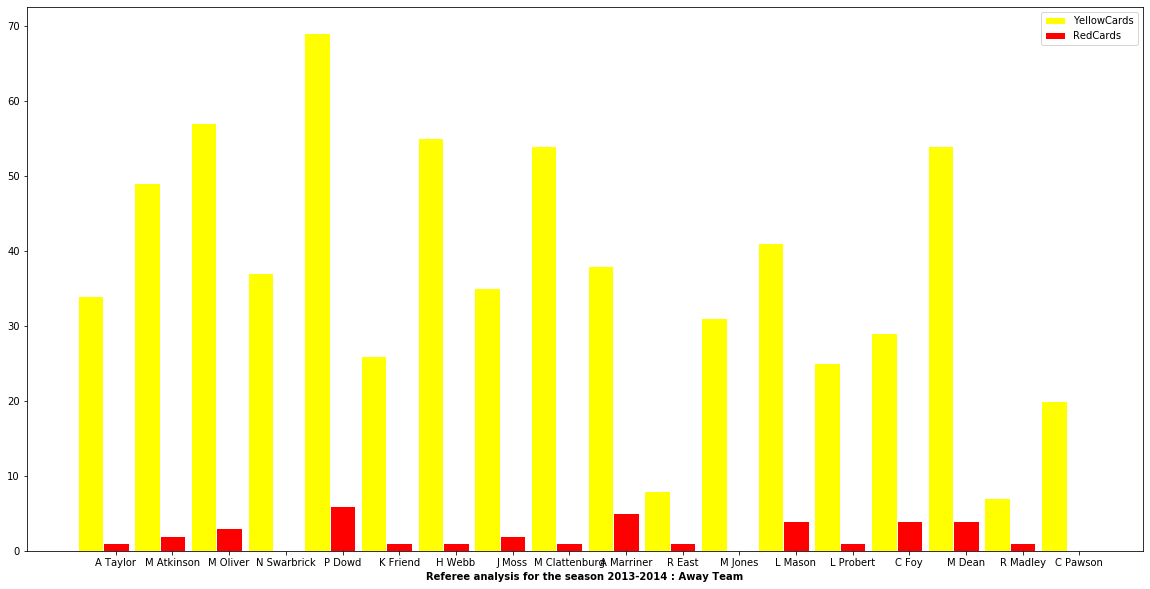

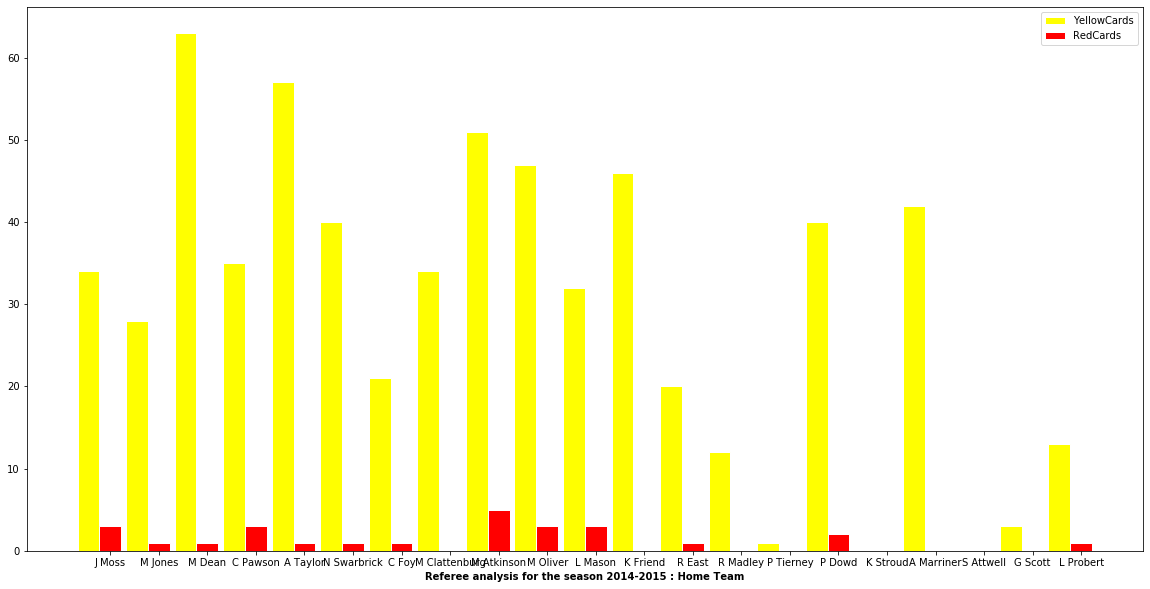

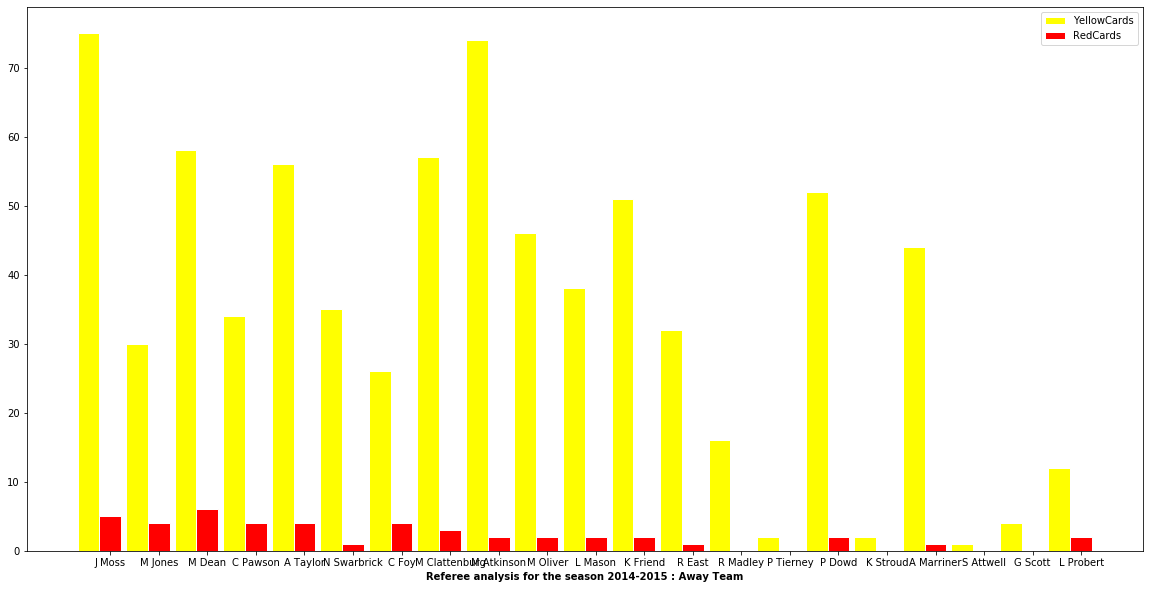

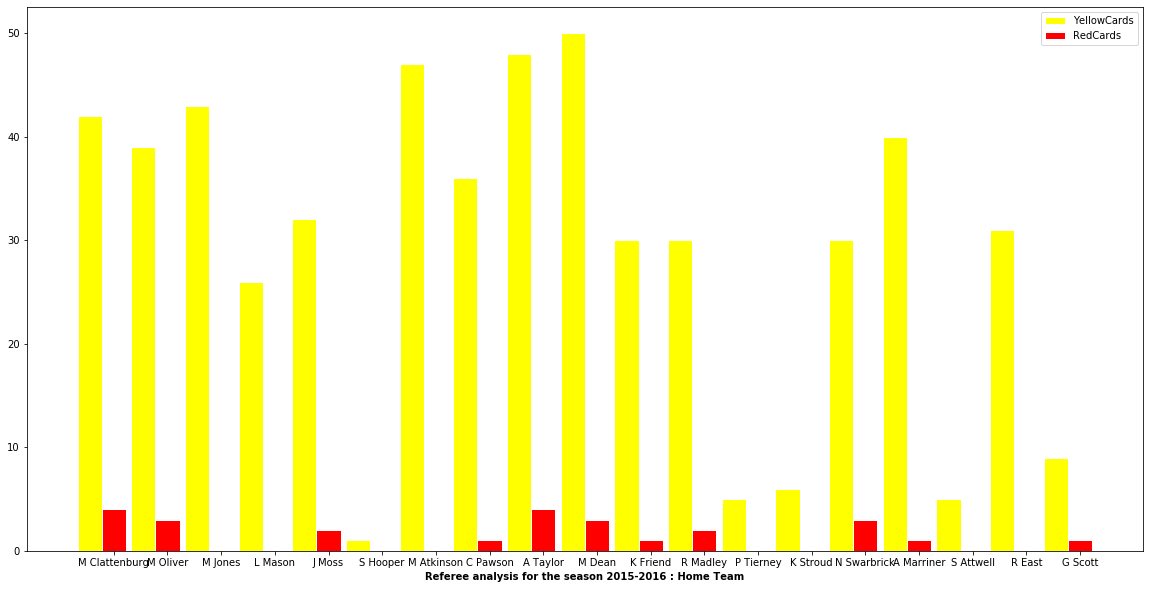

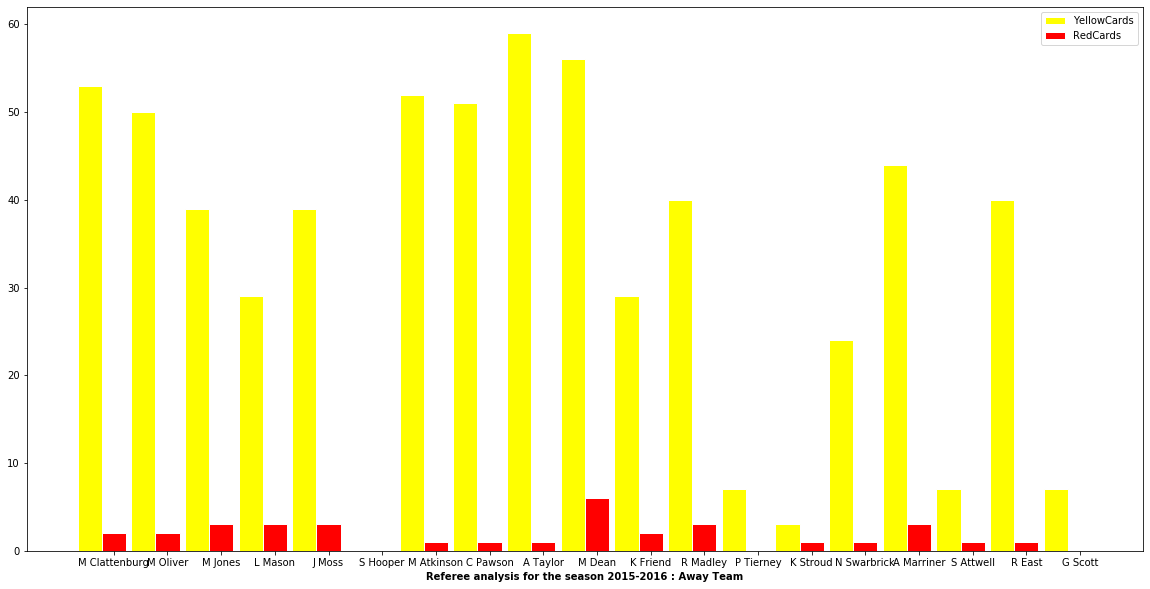

In [0]:
league_Seasons = ['2012-2013','2013-2014','2014-2015','2015-2016']

def drawRefereeBarGraph(lstBarYellowInfo,lstBarRedInfo,lstRefree,strSeason):
   
    # set width of bar
    barWidth = 0.45
 
   
    # Set position of bar on X axis
    r1 = np.arange(len(lstBarYellowInfo))  
    r2 = [x + barWidth for x in r1]
    #print(r2)
   
 
    plt.figure(figsize=(20, 10))
    # Make the plot
    plt.bar(r1, lstBarYellowInfo, color='#FFFF00', width=barWidth, edgecolor='white', label='YellowCards')
    plt.bar(r2, lstBarRedInfo, color='r', width=barWidth, edgecolor='white',label='RedCards')
   
 
    # Add xticks on the middle of the group bars
    plt.xlabel('Referee analysis for the season '+ strSeason, fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(lstBarYellowInfo))], lstRefree)
 
    # Create legend & Show graphic
    plt.legend()
    plt.show()
   


#method to add the data to the respective lists....
def displayRefereeInfo(FBdataframe,strSeason):
   
    lstHomeYellowCard = []
    lstHomeRedCard = []
    lstAwayYellowCard = []
    lstAwayRedCard = []
   
    lstRefree = list(FBdataframe['Referee'].unique())
    gk = FBdataframe.groupby('Referee')
    gk.first()
   
    for refree in lstRefree:
       
        lstHomeYellowCard.append(((gk.get_group(refree))['HY']).sum())
        lstHomeRedCard.append(((gk.get_group(refree))['HR']).sum())
       
        lstAwayYellowCard.append(((gk.get_group(refree))['AY']).sum())
        lstAwayRedCard.append(((gk.get_group(refree))['AR']).sum())    
   
    drawRefereeBarGraph(lstHomeYellowCard,lstHomeRedCard,lstRefree,strSeason+" : Home Team")
    drawRefereeBarGraph(lstAwayYellowCard,lstAwayRedCard,lstRefree,strSeason + " : Away Team")
   
displayRefereeInfo(df2012_13,league_Seasons[0])
displayRefereeInfo(df2013_14,league_Seasons[1])
displayRefereeInfo(df2014_15,league_Seasons[2])
displayRefereeInfo(df2015_16,league_Seasons[3])